# Introduction
<font color = 'purple'>
content:
    
 1. [Load and Check Data](#1)
 2. [Variable Description](#2)
    * [Univariate Variable Analysis](#3)
      * [Categorical Variable Analysis](#4)
      * [Numerical Variable Analysis](#5)
 3. [Basic Data Analysis](#6)
 4. [Outlier Detection](#7)
 5. [Missing Value](#8)
    * [Find Missing Value](#9)
    * [Fill Missing Value](#10)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from collections import Counter
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id='1'></a>
# Load and Check data

In [2]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_passengerid=df_test['PassengerId']

In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [8]:
df_train['Alone'] = np.where(df_train['FamilySize'] == 1, 1, 0)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1


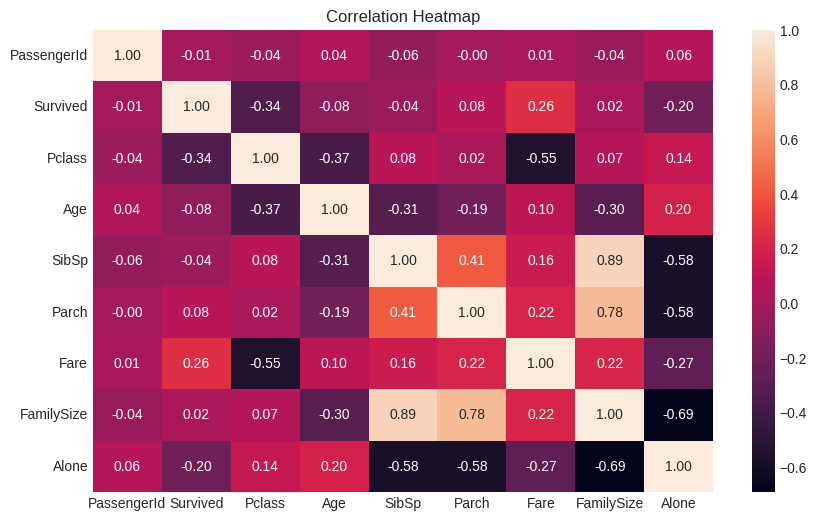

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<a id='2'></a>
# Variable Description
1. PassengerId: unique
3. Survived: survived(1) or died(0)
4. Pclass
5. Name
6. Sex
7. Age
8. SibSp
9. Parch
10. Ticket
11. Fare: money spent on ticket
12. Cabin
13. Embarked:port

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  FamilySize   891 non-null    int64  
 13  Alone        891 non-null    int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 97.6+ KB


* int64 = passengerid, survived, pclass, sibsp, parch
* object= name, sex, ticket, cabin, embarked
* float64= age, fare

<a id='3'></a>
# Univariate Variable Analysis
 * Categorical Variable : survived, sex, pclass, embarked, cabin, name, ticket, sibsp and parch
 * Numerical Variable : fare, age and passengerid

<a id='4'></a>
## Categorical Variable 

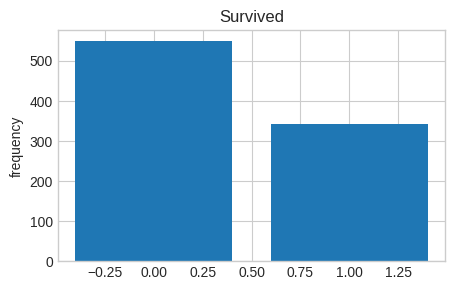

Survived:
 Survived
0    549
1    342
Name: count, dtype: int64


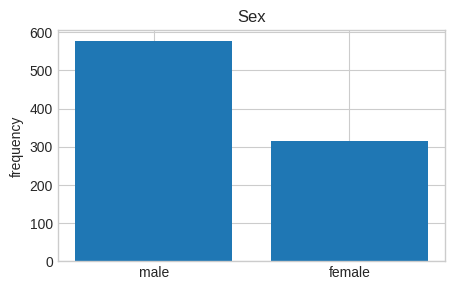

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64


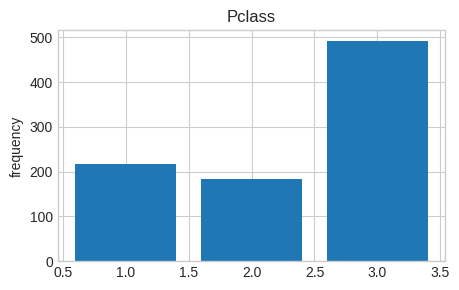

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


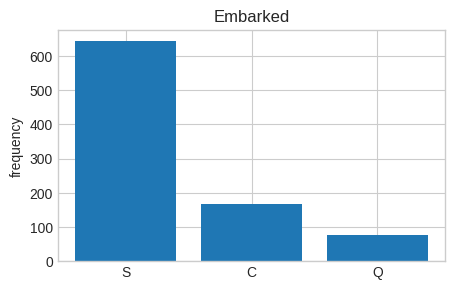

Embarked:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


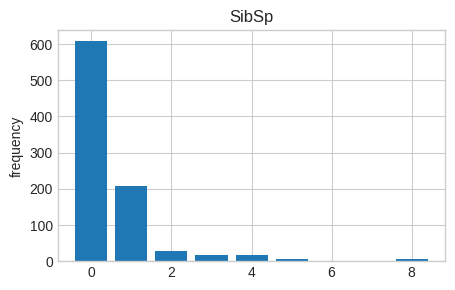

SibSp:
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


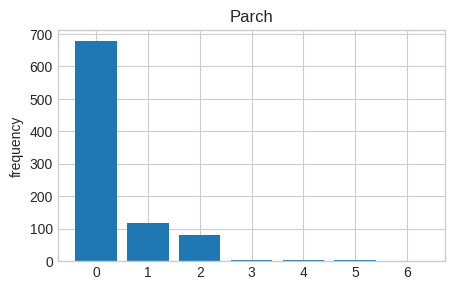

Parch:
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [11]:
def bar_plot(variable): # Köşeli parantez yerine normal parantez kullanın
    var= df_train[variable]
    varvalue= var.value_counts()
    plt.figure(figsize=(5,3))
    plt.bar(varvalue.index.values, varvalue.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varvalue))

# Geri kalan kodunuz doğru görünüyor:
cat1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in cat1:
    bar_plot(c)

In [12]:
cat2= ["Cabin","Name", "Ticket"]
for c in cat2:
    print("{} \n".format(df_train[c].value_counts))

<bound method IndexOpsMixin.value_counts of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object> 

<bound method IndexOpsMixin.value_counts of 0             A/5 21171


<a id='5'></a>
## Numerical Variable 

In [13]:
def plot_hist(variable):
    plt.figure(figsize=(6,3))
    plt.hist(df_train[variable])
    plt.ylabel("frequency")
    plt.xlabel(variable)
    plt.title("{} distrubition with histogram".format(variable))
    plt.show

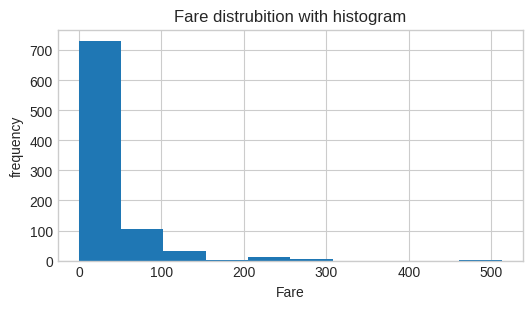

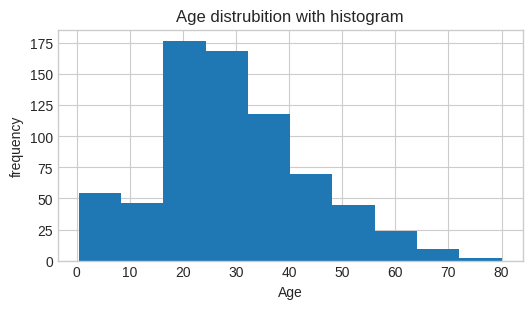

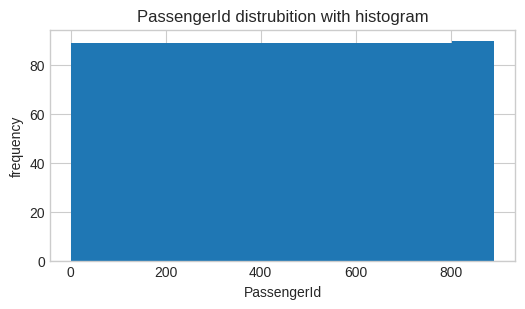

In [14]:
numvar = ["Fare", "Age", "PassengerId"]
for c in numvar:
    plot_hist(c)

passenger id önemli bir parametre değil

<a id='6'></a>
# Basic Data Analysis

* Pclass - survived
* Sex - survived
* SibSp -survived
* Parch - survived

In [15]:
#pclass vs survived
df_train[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
#sex vs survived
df_train[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
#sibsp vs survived
df_train[["SibSp","Survived"]].groupby(["SibSp"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
#Parch vs survived
df_train[["Parch","Survived"]].groupby(["Parch"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [19]:
def bivar(var1,var2,df=df_train):
    counts = df.groupby([var1, var2]).size().unstack(fill_value=0)
    plt.figure(figsize=(7, 4))
    
    counts.plot(kind='bar') 
    
    plt.title(f"Survival by {var1}")
    plt.xlabel(var1)
    plt.ylabel("Sayı (Count)")
    plt.legend(title=var2)
    plt.show()

Survive rate for sex, class, sibsp, embarked, and alone.

<Figure size 700x400 with 0 Axes>

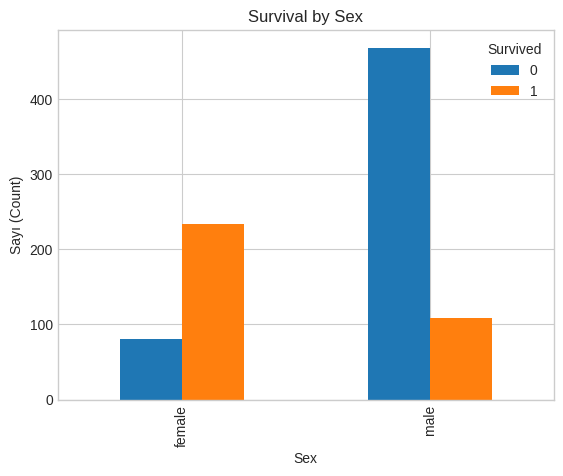

<Figure size 700x400 with 0 Axes>

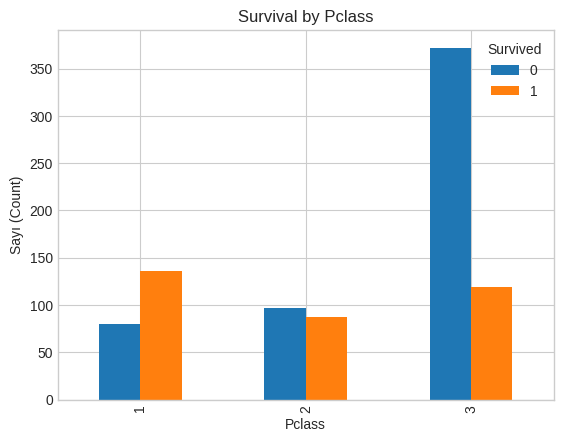

<Figure size 700x400 with 0 Axes>

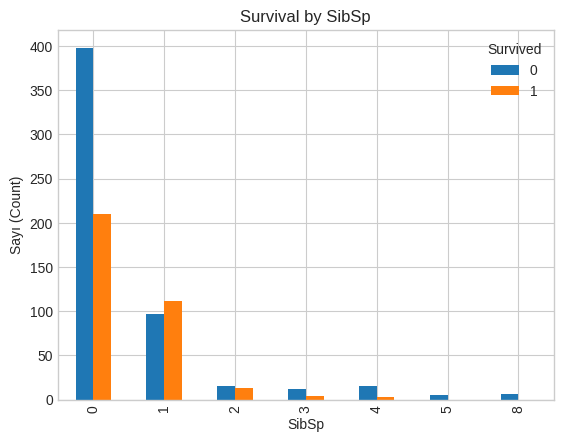

<Figure size 700x400 with 0 Axes>

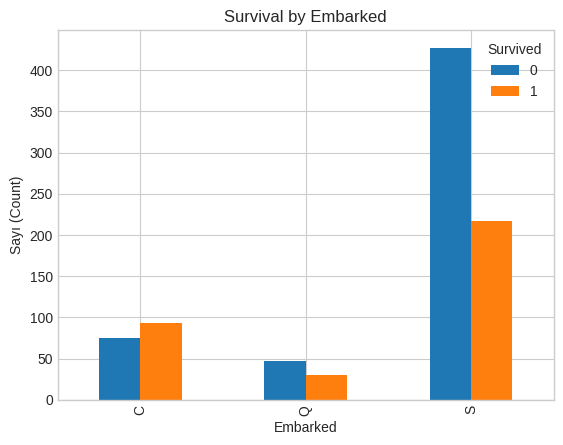

<Figure size 700x400 with 0 Axes>

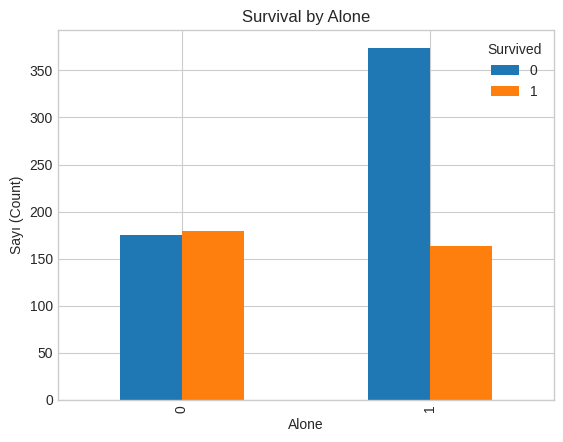

In [20]:
cat1 = [("Sex","Survived"),("Pclass","Survived"), ("SibSp","Survived"), ("Embarked","Survived"),("Alone","Survived")]
for c in cat1:
    bivar(*c)

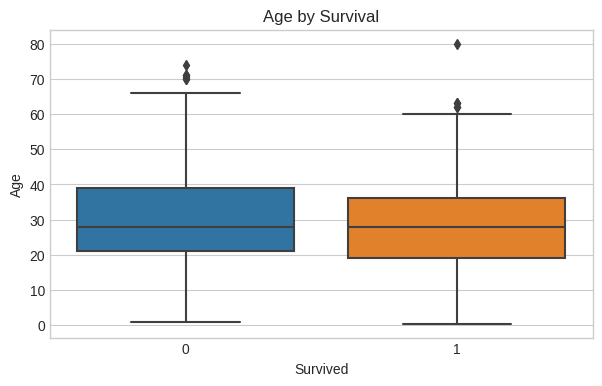

In [21]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df_train, x="Survived", y="Age")
plt.title("Age by Survival")
plt.show()

<a id='7'></a>
# Outlier Detection

In [22]:
def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c], 25)
        Q3 = np.percentile(df[c], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
    
        outlier_list_col = df[
            (df[c] < (Q1 - outlier_step)) |
            (df[c] > (Q3 + outlier_step))
        ].index


        outlier_indices.extend(outlier_list_col)

    outlier_counter = Counter(outlier_indices)
    multiple_outliers = [i for i, v in outlier_counter.items() if v > 2]

    return multiple_outliers


In [23]:
df_train.loc[detect_outliers(df_train,["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S,6,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S,6,0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S,6,0
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,11,0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,11,0


In [24]:
#drop outliers
df_train= df_train.drop(detect_outliers(df_train,["Age","SibSp","Parch", "Fare"]),axis=0).reset_index(drop=True)

<a id='8'></a>
# Missing Value
* Find missing value
* Fill missing value

In [25]:
df_train_len= len(df_train)
df_train = pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

In [26]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,0.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,1.0


<a id='9'></a>
## Find missing value

In [27]:
df_train.columns[df_train.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Alone'], dtype='object')

In [28]:
df_train.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
FamilySize      418
Alone           418
dtype: int64

<a id='10'></a>
## Fill missing value

In [29]:
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,1.0,1.0
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,1.0,1.0


<Axes: title={'center': 'Fare'}, xlabel='Embarked'>

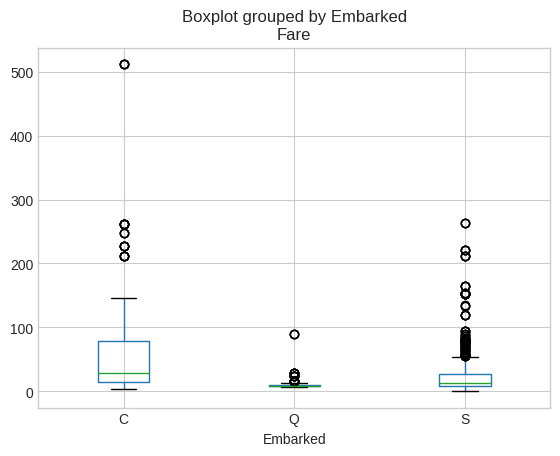

In [30]:
df_train.boxplot(column="Fare",by = "Embarked")

In [31]:
df_train["Embarked"]=df_train["Embarked"].fillna("C")
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone


In [32]:
df_train[df_train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,NaN,NaN


In [33]:
np.mean(df_train[df_train["Pclass"]==3]["Fare"])

12.741219971469329

In [34]:
df_train["Fare"]=df_train["Fare"].fillna("12.741219971469329")
df_train[df_train["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone


# indexing

In [35]:
data1 = df_train.set_index(["Pclass", "Embarked"])
data1.sort_index(inplace=True)
data1

PassengerId  Survived  \
Pclass Embarked                          
1      C                   2       1.0   
       C                  31       0.0   
       C                  32       1.0   
       C                  35       0.0   
       C                  53       1.0   
...                      ...       ...   
3      S                1301       NaN   
       S                1304       NaN   
       S                1305       NaN   
       S                1307       NaN   
       S                1308       NaN   

                                                              Name     Sex  \
Pclass Embarked                                                              
1      C         Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
       C                                  Uruchurtu, Don. Manuel E    male   
       C            Spencer, Mrs. William Augustus (Marie Eugenie)  female   
       C                                   Meyer, Mr. Edgar Joseph    male   
       C                  Harper, Mrs. Henry Sleeper (Myna Haxtun)  female   
...                                                            ...     ...   
3      S                                 Peacock, Miss. Treasteall  female   
       S                            Henriksson, Miss. Jenny Lovisa  female   
       S                                        Spector, Mr. Woolf    male   
       S                              Saether, Mr. Simon Sivertsen    male   
       S                                       Ware, Mr. Frederick    male   

                  Age  SibSp  Parch              Ticket      Fare Cabin  \
Pclass Embarked                                                           
1      C         38.0      1      0            PC 17599   71.2833   C85   
       C         40.0      0      0            PC 17601   27.7208   NaN   
       C          NaN      1      0            PC 17569  146.5208   B78   
       C         28.0      1      0            PC 17604   82.1708   NaN   
       C         49.0      1      0            PC 17572   76.7292   D33   
...               ...    ...    ...                 ...       ...   ...   
3      S          3.0      1      1  SOTON/O.Q. 3101315    13.775   NaN   
       S         28.0      0      0              347086     7.775   NaN   
       S          NaN      0      0           A.5. 3236      8.05   NaN   
       S         38.5      0      0  SOTON/O.Q. 3101262      7.25   NaN   
       S          NaN      0      0              359309      8.05   NaN   

                 FamilySize  Alone  
Pclass Embarked                     
1      C                2.0    0.0  
       C                1.0    1.0  
       C                2.0    0.0  
       C                2.0    0.0  
       C                2.0    0.0  
...                     ...    ...  
3      S                NaN    NaN  
       S                NaN    NaN  
       S                NaN    NaN  
       S                NaN    NaN  
       S                NaN    NaN  

[1299 rows x 12 columns]

In [36]:
data1.loc[1:200,'Name':'Age']

Name     Sex  \
Pclass Embarked                                                              
1      C         Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
       C                                  Uruchurtu, Don. Manuel E    male   
       C            Spencer, Mrs. William Augustus (Marie Eugenie)  female   
       C                                   Meyer, Mr. Edgar Joseph    male   
       C                  Harper, Mrs. Henry Sleeper (Myna Haxtun)  female   
...                                                            ...     ...   
3      S                                 Peacock, Miss. Treasteall  female   
       S                            Henriksson, Miss. Jenny Lovisa  female   
       S                                        Spector, Mr. Woolf    male   
       S                              Saether, Mr. Simon Sivertsen    male   
       S                                       Ware, Mr. Frederick    male   

                  Age  
Pclass Embarked        
1      C         38.0  
       C         40.0  
       C          NaN  
       C         28.0  
       C         49.0  
...               ...  
3      S          3.0  
       S         28.0  
       S          NaN  
       S         38.5  
       S          NaN  

[1299 rows x 3 columns]

# filtering

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1299 entries, 0 to 1298
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1299 non-null   int64  
 1   Survived     881 non-null    float64
 2   Pclass       1299 non-null   int64  
 3   Name         1299 non-null   object 
 4   Sex          1299 non-null   object 
 5   Age          1043 non-null   float64
 6   SibSp        1299 non-null   int64  
 7   Parch        1299 non-null   int64  
 8   Ticket       1299 non-null   object 
 9   Fare         1299 non-null   object 
 10  Cabin        292 non-null    object 
 11  Embarked     1299 non-null   object 
 12  FamilySize   881 non-null    float64
 13  Alone        881 non-null    float64
dtypes: float64(4), int64(4), object(6)
memory usage: 142.2+ KB


In [38]:
df_train['Fare'] = df_train['Fare'].astype('float')  # Veya 'float'

In [39]:
first_filter = df_train.Age > 20
second_filter = df_train.Fare > 3000
df_train[first_filter & second_filter]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone
